# Calculate Disperser transmission for simulation

- author Sylvie Dagoret-Campagne
- creation date : May 2018
- affliliation : CNRS/IN2P3
- project : DESC-LSST

## Setup

### import

In [291]:
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import glob
from matplotlib.backends.backend_pdf import PdfPages 

In [292]:
import seaborn as sns

In [293]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [294]:
from spectractorsim import *
from libspecana import *

### Figure style

In [295]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [296]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

In [297]:
#func = interpolate.interp1d(X, Y)   

## Initialisation

### Spectractor

In [298]:
PATH_SPECTRACTOR='../../Spectractor'
PATH_SPECTRACTORSIM='../../SpectractorSim'
PATH_SPECTRACTORANAATM='../../SpectractorAnaAtm/common_tools'
PATH_GMAOMERRA='../merra2'

In [299]:
sys.path.append(PATH_SPECTRACTOR)
sys.path.append(PATH_SPECTRACTORSIM)
sys.path.append(PATH_SPECTRACTORANAATM)
sys.path.append(PATH_GMAOMERRA)

In [300]:
from spectractorsim import *
from libspecana import *

# Simulated transmissions

In [301]:
tel=TelescopeTransmission()
trans=tel.load_transmission()

In [302]:
filter_blue=tel.tfb(WL)
filter_red=tel.tfr(WL)

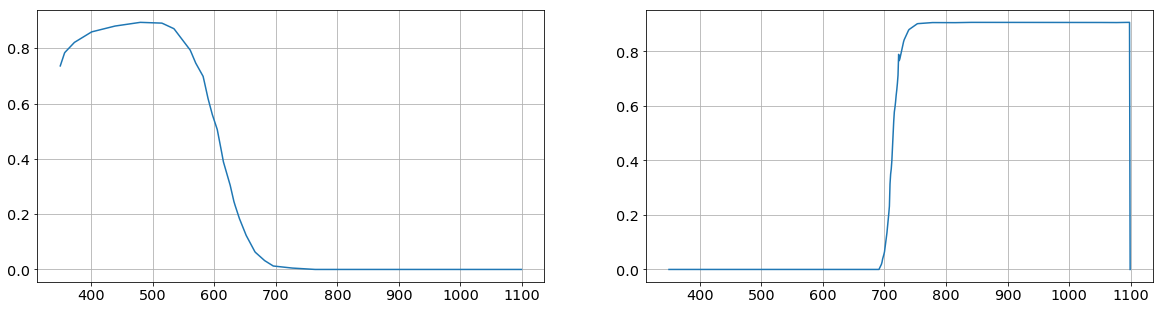

In [303]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(WL,filter_blue)
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(WL,filter_red)
plt.grid()

In [304]:
indexes_blue=np.where(WL<700)[0]
indexes_red=np.where(WL>700)[0]

In [305]:
print indexes_blue

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [306]:
print indexes_red

[351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386
 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422
 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476
 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494
 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512
 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530
 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548
 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566
 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584
 585 586 587 588 589 590 591 592 593 594 595 596 59

# Read the files

## Fichier d'Augustin

In [307]:
file0="data/Augustin/t_tel_r400.list"

In [308]:
data=np.loadtxt(file0)

In [309]:
data.shape

(3198, 2)

In [310]:
wl0=data[:,0]
thrpt0=data[:,1]

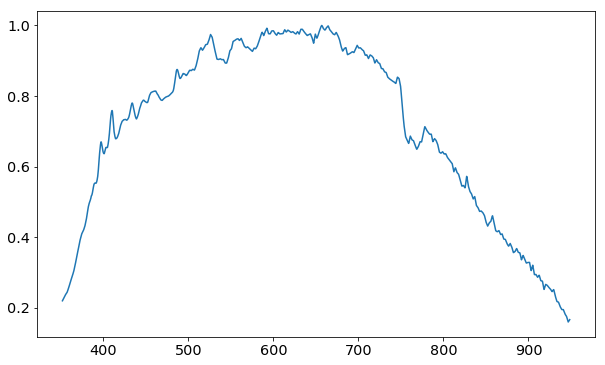

In [311]:
plt.plot(wl0,thrpt0)

In [312]:
SelectionFlag=np.invert(np.isnan(thrpt0))

In [313]:
sel_thrpt0=thrpt0[SelectionFlag]
sel_wl0=wl0[SelectionFlag]
#thrpt0_smooth=smooth(sel_thrpt0,window_len=101)
thrpt0_smooth=smooth(sel_thrpt0,window_len=301)

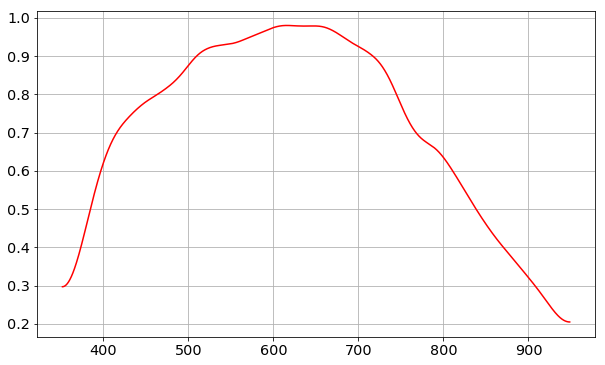

In [314]:
#plt.plot(sel_wl0,sel_thrpt0,'b-')
plt.plot(sel_wl0,thrpt0_smooth,'r-')
plt.grid()

## Orsay

In [315]:
files=["disp_thrpt_300517_hd111980.csv","disp_thrpt_080617_hd111980.csv","disp_thrpt_120617_hd111980.csv"]

In [316]:
df1=pd.read_csv(files[0],index_col=0)
df2=pd.read_csv(files[1],index_col=0)
df3=pd.read_csv(files[2],index_col=0)

In [317]:
df1.head()

,wl,thrpt_ron400,thrpt_thor300,thrpt_holoPhP,thrpt_holoPhAg,thrpt_holoAmAg,thrpt_ron400_err,thrpt_thor300_err,thrpt_holoPhP_err,thrpt_holoPhAg_err,thrpt_holoAmAg_err
0,350,0.017344,0.042159,0.015511,0.006453,0.002929,0.001204,0.000968,0.001025,0.000735,0.000174
1,351,0.018088,0.043970,0.016475,0.006781,0.002925,0.001235,0.000995,0.001069,0.000759,0.000174
2,352,0.018864,0.045858,0.017499,0.007126,0.002920,0.001266,0.001023,0.001115,0.000784,0.000174
3,353,0.019673,0.047827,0.018586,0.007489,0.002915,0.001298,0.001051,0.001163,0.000810,0.000174
4,354,0.027546,0.067376,0.030035,0.011240,0.002911,0.001565,0.001299,0.001599,0.001042,0.000174


In [318]:
df2.head()

,wl,thrpt_ron200,thrpt_thor300,thrpt_holoPhP,thrpt_holoPhAg,thrpt_holoAmAg,thrpt_ron200_err,thrpt_thor300_err,thrpt_holoPhP_err,thrpt_holoPhAg_err,thrpt_holoAmAg_err
0,350,0.004438,0.056587,0.008298,0.003488,0.001060,0.002421,0.002182,0.003568,0.007327,0.000668
1,351,0.004780,0.056561,0.008966,0.003798,0.001057,0.002533,0.002182,0.003775,0.007641,0.000667
2,352,0.005149,0.056535,0.009688,0.004135,0.001054,0.002648,0.002181,0.003992,0.007966,0.000666
3,353,0.005546,0.056509,0.010468,0.004503,0.001051,0.002766,0.002181,0.004220,0.008301,0.000665
4,354,0.010022,0.056483,0.019414,0.008917,0.001047,0.003801,0.002180,0.006463,0.011399,0.000663


In [319]:
df3.head()

,wl,thrpt_thor300,thrpt_holoPhP,thrpt_holoPhAg,thrpt_holoAmAg,thrpt_thor300_err,thrpt_holoPhP_err,thrpt_holoPhAg_err,thrpt_holoAmAg_err
0,350,0.105216,0.007124,0.002992,0.001038,0.023111,0.004138,0.002965,0.000981
1,351,0.109558,0.007642,0.003246,0.001035,0.023684,0.004318,0.003120,0.000980
2,352,0.114078,0.008198,0.003523,0.001032,0.024265,0.004502,0.003282,0.000979
3,353,0.118785,0.008795,0.003822,0.001029,0.024853,0.004692,0.003450,0.000978
4,354,0.165764,0.015379,0.007359,0.001026,0.030053,0.006349,0.005049,0.000977


# Plot transmission comparison

## Ronchi 400 LAL - FAS

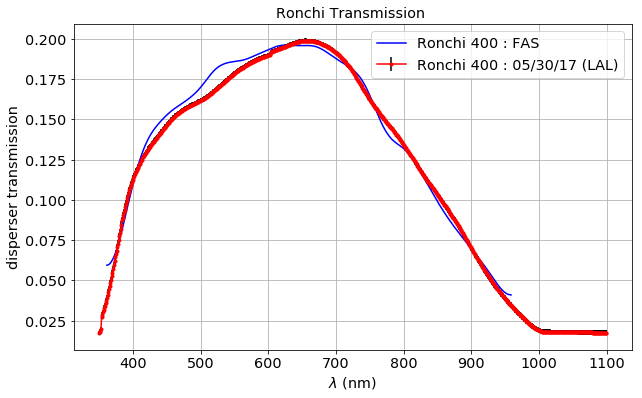

In [320]:
fig, ax = plt.subplots()
ax.errorbar(df1.wl, df1["thrpt_ron400"], yerr=df1["thrpt_ron400_err"],marker='.',color='red',ecolor='black',label='Ronchi 400 : 05/30/17 (LAL)')
ax.plot(sel_wl0+10.,0.2*thrpt0_smooth,'b-',label="Ronchi 400 : FAS")
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("disperser transmission")
ax.set_title("Ronchi Transmission ")
ax.legend(loc='upper right')

In [321]:
X1=df1.wl
Y1=df1["thrpt_ron400"]
func1 = interpolate.interp1d(X1, Y1) 

X2=sel_wl0+10.
Y2=0.2*thrpt0_smooth
func2 = interpolate.interp1d(X2, Y2) 


In [322]:
newY1=func1(X2)

In [323]:
deltaY=newY1-Y2
deltaY_over_Y=deltaY/newY1

(-0.02, 0.02)

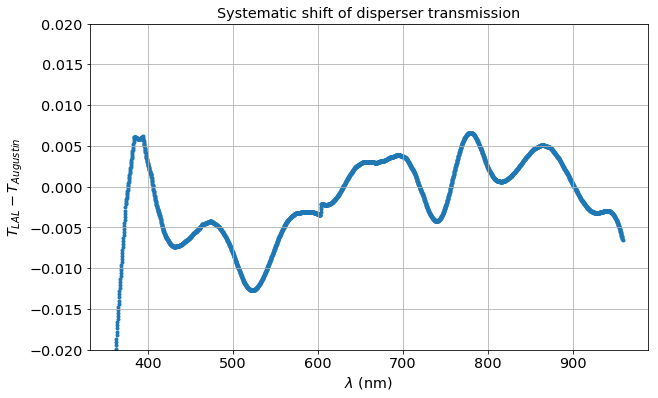

In [350]:
plt.scatter(X2,newY1-Y2,marker='.')
plt.grid()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("$T_{LAL} - T_{Augustin}$")
plt.title("Systematic shift of disperser transmission")
plt.ylim(-0.020,0.02)

In [325]:
index_sel=np.where(np.logical_and(X2>400,X2<900))[0]

In [326]:
index_sel

array([ 154,  155,  156, ..., 2150, 2151, 2152])

In [327]:
deltaY_sel=deltaY[index_sel]
deltaY_over_Y_sel=deltaY_over_Y[index_sel]

In [328]:
title='Transmision diff :$\Delta T={:5.4f} \pm {:5.4f} , \; 400nm < \lambda < 900nm$ '.format(deltaY_sel.mean(),deltaY_sel.std())

In [329]:
deltaY.mean()

-0.0014745008102817303

In [330]:
deltaY.std()

0.0050052500781324026

Text(0.5,0,'$\\Delta T = T_{LAL} - T_{Augustin}$')

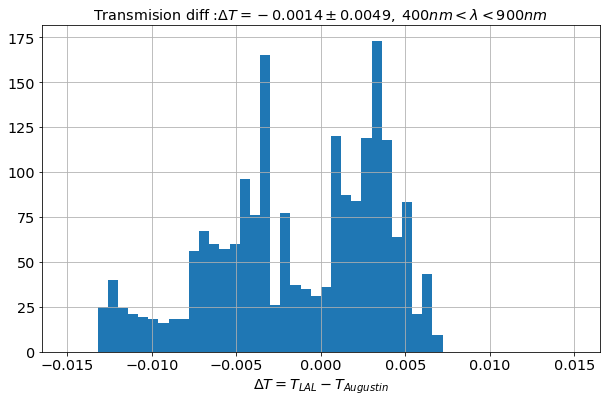

In [331]:
plt.hist(deltaY_sel,bins=50,range=(-0.015,0.015));
plt.grid()
plt.title(title)
plt.xlabel("$\Delta T = T_{LAL} - T_{Augustin}$")

In [332]:
title='Relative Transmission err  :$\Delta T/T={:5.4f} \pm {:5.4f} , \; 400nm < \lambda < 900nm$ '.format(deltaY_over_Y_sel.mean(),deltaY_over_Y_sel.std())

Text(0.5,0,'$\\Delta T/T$')

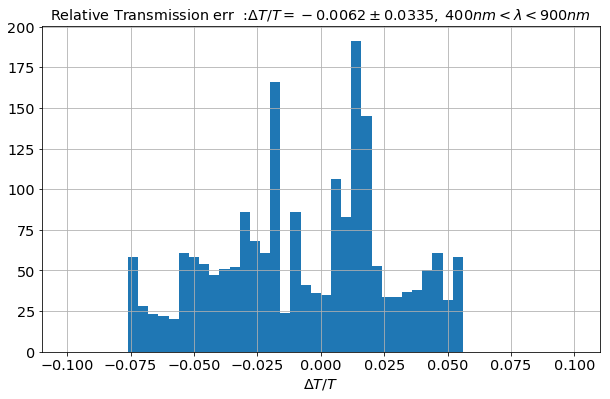

In [333]:
plt.hist(deltaY_over_Y_sel,bins=50,range=(-0.1,0.1));
plt.grid()
plt.title(title)
plt.xlabel("$\Delta T/T$")

## Ronchi transmission

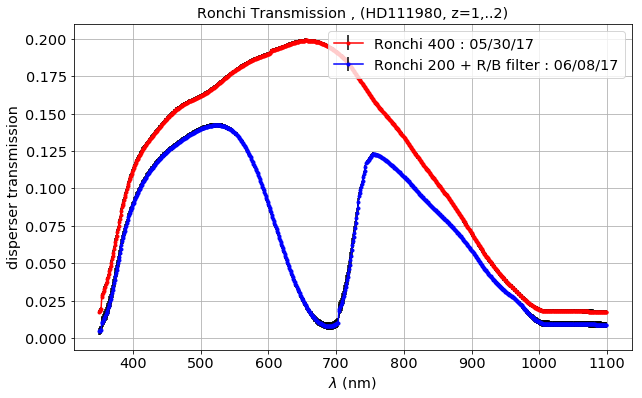

In [334]:
fig, ax = plt.subplots()
ax.errorbar(df1.wl, df1["thrpt_ron400"], yerr=df1["thrpt_ron400_err"],marker='.',color='red',ecolor='black',label='Ronchi 400 : 05/30/17')
ax.errorbar(df2.wl, df2["thrpt_ron200"], yerr=df2["thrpt_ron200_err"],marker='.',color='blue',ecolor='black',label='Ronchi 200 + R/B filter : 06/08/17')
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("disperser transmission")
ax.set_title("Ronchi Transmission , (HD111980, z=1,..2)")
ax.legend(loc='upper right')

In [335]:
WLB=WL[indexes_blue]
WLR=WL[indexes_red]

filter_blue=filter_blue[indexes_blue]
filter_red=filter_red[indexes_red]

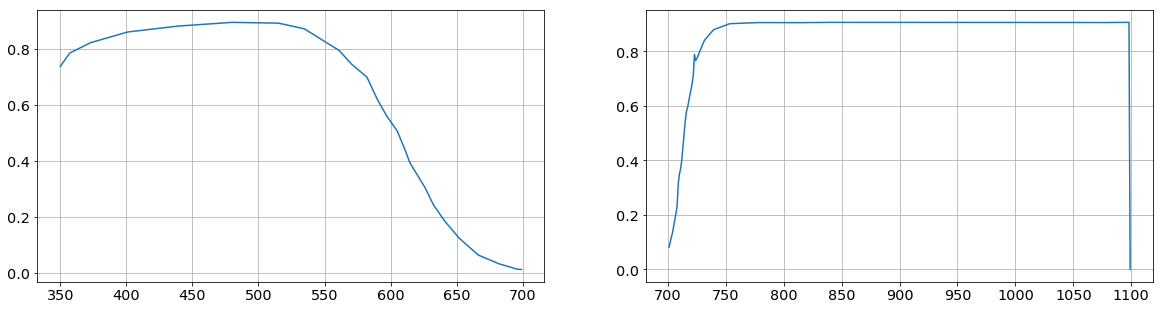

In [336]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(WLB,filter_blue)
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(WLR,filter_red)
plt.grid()

In [337]:
data_filter_blue=df2["thrpt_ron200"].values[indexes_blue]
data_filter_blue_err=df2["thrpt_ron200_err"].values[indexes_blue]

data_filter_red=df2["thrpt_ron200"].values[indexes_red]
data_filter_red_err=df2["thrpt_ron200_err"].values[indexes_red]

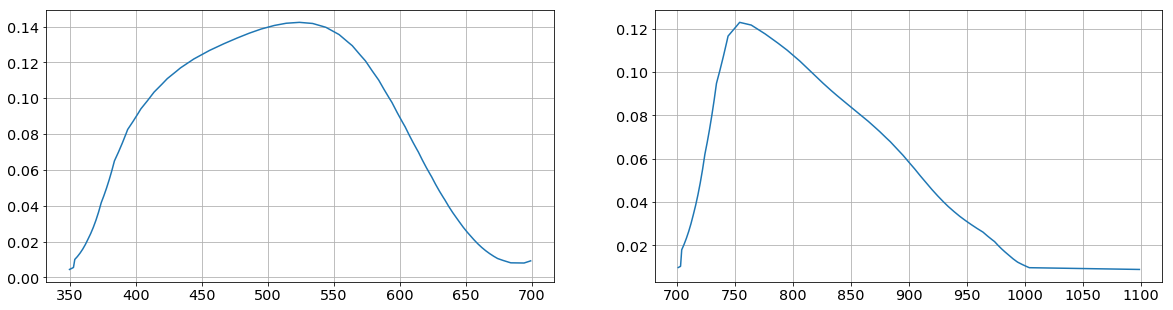

In [338]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(WLB,data_filter_blue)
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(WLR,data_filter_red)
plt.grid()

In [339]:
data_filter_blue_ratio=data_filter_blue/filter_blue
data_filter_red_ratio=data_filter_red/filter_red

data_filter_blue_ratio_err=data_filter_blue_err/filter_blue
data_filter_red_ratio_err=data_filter_red_err/filter_red

/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


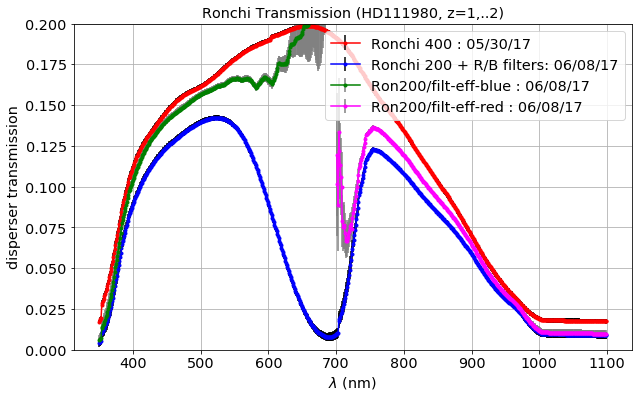

In [340]:
fig, ax = plt.subplots()
ax.errorbar(df1.wl, df1["thrpt_ron400"], yerr=df1["thrpt_ron400_err"],marker='.',color='red',ecolor='black',label='Ronchi 400 : 05/30/17')
ax.errorbar(df2.wl, df2["thrpt_ron200"], yerr=df2["thrpt_ron200_err"],marker='.',color='blue',ecolor='black',label='Ronchi 200 + R/B filters: 06/08/17')
ax.errorbar(WLB,data_filter_blue_ratio,yerr=data_filter_blue_ratio_err,marker='.',color='green',ecolor='grey',label='Ron200/filt-eff-blue : 06/08/17')
ax.errorbar(WLR,data_filter_red_ratio,yerr=data_filter_red_ratio_err,marker='.',color='magenta',ecolor='grey',label='Ron200/filt-eff-red : 06/08/17')
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("disperser transmission")
ax.set_title("Ronchi Transmission (HD111980, z=1,..2)")
ax.set_ylim(0.,0.2)
ax.legend(loc='upper right')

## Thorlab comparison

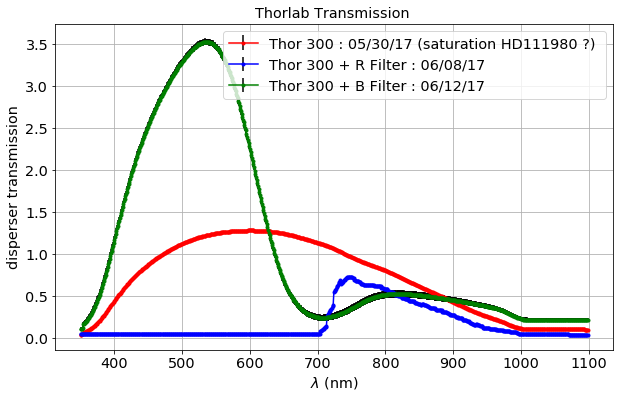

In [341]:
fig, ax = plt.subplots()
ax.errorbar(df1.wl, df1["thrpt_thor300"], yerr=df1["thrpt_thor300_err"],marker='.',color='red',ecolor='black',label='Thor 300 : 05/30/17 (saturation HD111980 ?) ')
ax.errorbar(df2.wl, df2["thrpt_thor300"], yerr=df2["thrpt_thor300_err"],marker='.',color='blue',ecolor='black',label='Thor 300 + R Filter : 06/08/17')
ax.errorbar(df3.wl, df3["thrpt_thor300"], yerr=df3["thrpt_thor300_err"],marker='.',color='green',ecolor='black',label='Thor 300 + B Filter : 06/12/17')
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("disperser transmission")
ax.set_title("Thorlab Transmission ")
ax.legend(loc='upper right')

## HoloPhP

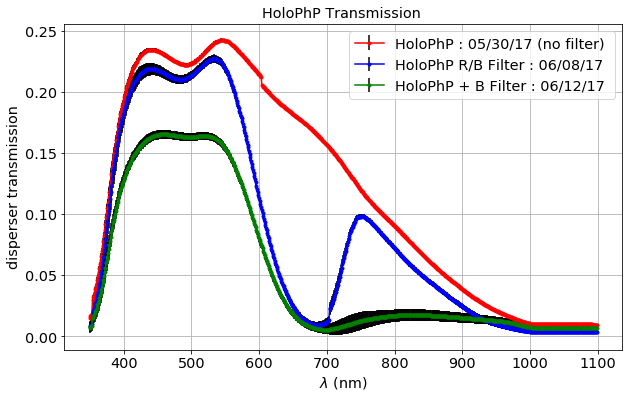

In [342]:
fig, ax = plt.subplots()
ax.errorbar(df1.wl, df1["thrpt_holoPhP"], yerr=df1["thrpt_holoPhP_err"],marker='.',color='red',ecolor='black',label='HoloPhP : 05/30/17 (no filter) ')
ax.errorbar(df2.wl, df2["thrpt_holoPhP"], yerr=df2["thrpt_holoPhP_err"],marker='.',color='blue',ecolor='black',label='HoloPhP R/B Filter : 06/08/17')
ax.errorbar(df3.wl, df3["thrpt_holoPhP"], yerr=df3["thrpt_holoPhP_err"],marker='.',color='green',ecolor='black',label='HoloPhP + B Filter : 06/12/17')
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("disperser transmission")
ax.set_title("HoloPhP Transmission ")
ax.legend(loc='upper right')

## HoloPhAg

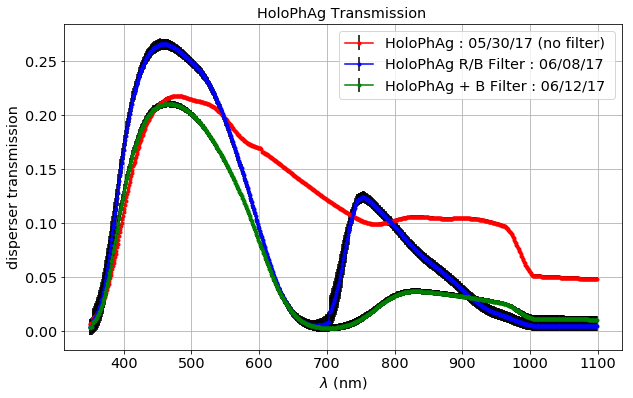

In [343]:
fig, ax = plt.subplots()
ax.errorbar(df1.wl, df1["thrpt_holoPhAg"], yerr=df1["thrpt_holoPhAg_err"],marker='.',color='red',ecolor='black',label='HoloPhAg : 05/30/17 (no filter) ')
ax.errorbar(df2.wl, df2["thrpt_holoPhAg"], yerr=df2["thrpt_holoPhAg_err"],marker='.',color='blue',ecolor='black',label='HoloPhAg R/B Filter : 06/08/17')
ax.errorbar(df3.wl, df3["thrpt_holoPhAg"], yerr=df3["thrpt_holoPhAg_err"],marker='.',color='green',ecolor='black',label='HoloPhAg + B Filter : 06/12/17')
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("disperser transmission")
ax.set_title("HoloPhAg Transmission ")
ax.legend(loc='upper right')

## HoloAmAg

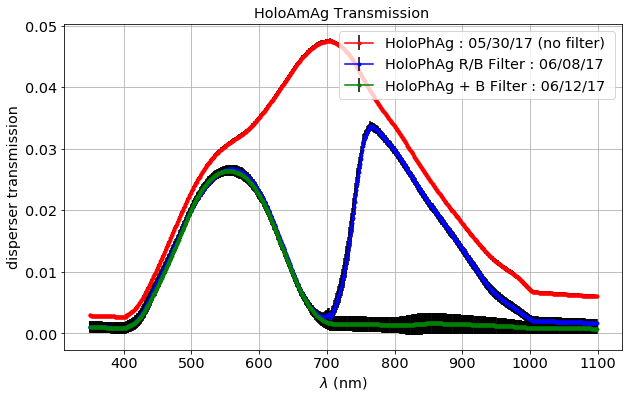

In [344]:
fig, ax = plt.subplots()
ax.errorbar(df1.wl, df1["thrpt_holoAmAg"], yerr=df1["thrpt_holoAmAg_err"],marker='.',color='red',ecolor='black',label='HoloPhAg : 05/30/17 (no filter) ')
ax.errorbar(df2.wl, df2["thrpt_holoAmAg"], yerr=df2["thrpt_holoAmAg_err"],marker='.',color='blue',ecolor='black',label='HoloPhAg R/B Filter : 06/08/17')
ax.errorbar(df3.wl, df3["thrpt_holoAmAg"], yerr=df3["thrpt_holoAmAg_err"],marker='.',color='green',ecolor='black',label='HoloPhAg + B Filter : 06/12/17')
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("disperser transmission")
ax.set_title("HoloAmAg Transmission ")
ax.legend(loc='upper right')

In [345]:
data_filter_blue=df2["thrpt_holoAmAg"].values[indexes_blue]
data_filter_blue_err=df2["thrpt_holoAmAg_err"].values[indexes_blue]

data_filter_red=df2["thrpt_holoAmAg"].values[indexes_red]
data_filter_red_err=df2["thrpt_holoAmAg_err"].values[indexes_red]

In [346]:
data_filter_blue2=df3["thrpt_holoAmAg"].values[indexes_blue]
data_filter_blue2_err=df3["thrpt_holoAmAg_err"].values[indexes_blue]

In [347]:
data_filter_blue_ratio=data_filter_blue/filter_blue
data_filter_red_ratio=data_filter_red/filter_red

data_filter_blue_ratio_err=data_filter_blue_err/filter_blue
data_filter_red_ratio_err=data_filter_red_err/filter_red

/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


In [348]:
data_filter_blue2_ratio=data_filter_blue/filter_blue
data_filter_blue2_ratio_err=data_filter_blue2_err/filter_blue

(0.0, 0.06)

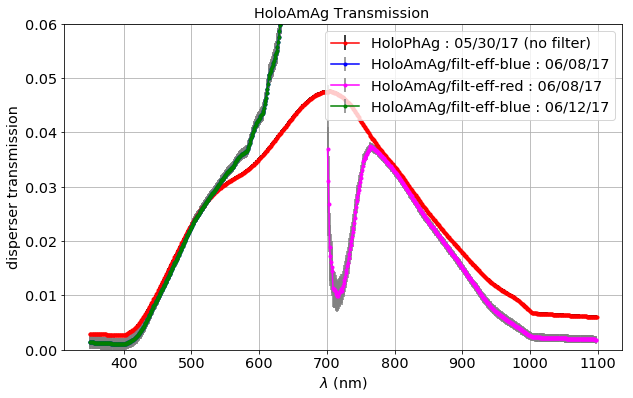

In [349]:
fig, ax = plt.subplots()
ax.errorbar(df1.wl, df1["thrpt_holoAmAg"], yerr=df1["thrpt_holoAmAg_err"],marker='.',color='red',ecolor='black',label='HoloPhAg : 05/30/17 (no filter) ')
ax.errorbar(WLB,data_filter_blue_ratio,yerr=data_filter_blue_ratio_err,marker='.',color='blue',ecolor='grey',label='HoloAmAg/filt-eff-blue : 06/08/17')
ax.errorbar(WLR,data_filter_red_ratio,yerr=data_filter_red_ratio_err,marker='.',color='magenta',ecolor='grey',label='HoloAmAg/filt-eff-red : 06/08/17')
ax.errorbar(WLB,data_filter_blue2_ratio,yerr=data_filter_blue2_ratio_err,marker='.',color='green',ecolor='grey',label='HoloAmAg/filt-eff-blue : 06/12/17')
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("disperser transmission")
ax.set_title("HoloAmAg Transmission ")
ax.legend(loc='upper right')
ax.set_ylim(0.,0.06)